In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv(r'C:\Users\Rahul Miglani\Untitled Folder\epi.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.columns = raw_data.columns.str.replace(' ', '_')
raw_data.columns = raw_data.columns.str.replace('#', '')

In [5]:
raw_data.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', 'cakeweek',
       'wasteless', '22-minute_meals', '3-ingredient_recipes',
       ...
       'yellow_squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack_week', 'turkey'],
      dtype='object', length=680)

In [6]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

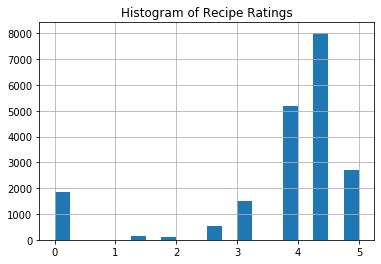

In [7]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [8]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [9]:
raw_data = raw_data.drop(['calories','protein','fat' ,'sodium'],axis = 1)

### EDA

In [29]:
x =raw_data.corr().rating.sort_values(ascending=False)[20]

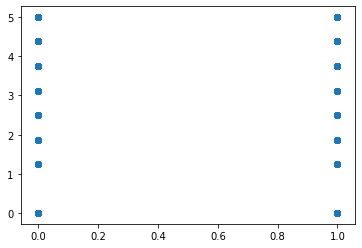

In [11]:
import seaborn as sns
plt.scatter(raw_data['bon_appétit'],raw_data['rating'])
#This seems like a categorical variable

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

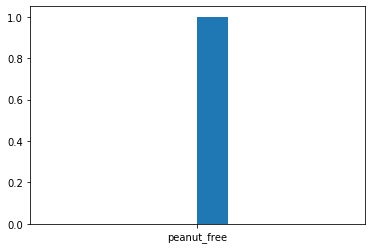

In [12]:
plt.hist('peanut_free')

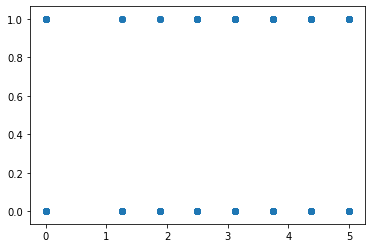

In [13]:
plt.scatter(raw_data['rating'], raw_data['pasta'])

In [18]:
#Creating binary target with mean of ratings
mean_rating = raw_data['rating'].mean()

(array([ 4145.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15907.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

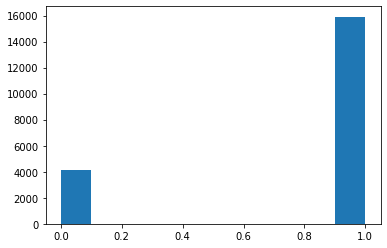

In [21]:
raw_data['target'] = np.where(raw_data['rating']>=mean_rating, 1, 0)
plt.hist(raw_data['target'])

In [30]:
raw_data_1 = raw_data.copy()

In [33]:
raw_data_1.head()

,title,rating,cakeweek,wasteless,22-minute_meals,3-ingredient_recipes,30_days_of_groceries,advance_prep_required,alabama,alaska,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack_week,turkey,target
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [128]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
  
data = onehotencoder.fit_transform(raw_data).toarray()

In [103]:
raw_data_1['rating_1']= raw_data_1['rating'].astype(str)
raw_data_1['bon_appétit'] = raw_data_1['bon_appétit'].astype(str)
raw_data_1['peanut_free'] = raw_data_1['peanut_free'].astype(str)

In [34]:
raw_data_1 = pd.concat([raw_data_1,pd.get_dummies(raw_data_1.bon_appétit, prefix="bon_appétit")], axis=1)
raw_data_1 = pd.concat([raw_data_1,pd.get_dummies(raw_data_1.peanut_free, prefix="peanut_free")], axis=1)
raw_data_1 = pd.concat([raw_data_1,pd.get_dummies(raw_data_1.bake, prefix="bake")], axis=1)
raw_data_1 = pd.concat([raw_data_1,pd.get_dummies(raw_data_1.soy_free, prefix="soy_free")], axis=1)
raw_data_1 = pd.concat([raw_data_1,pd.get_dummies(raw_data_1.peanut_free, prefix="tree_nut_free")], axis=1)


In [8]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

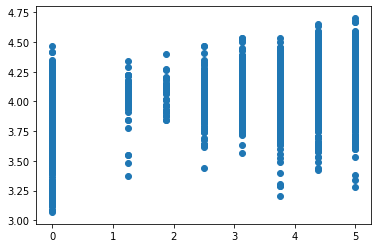

In [9]:
plt.scatter(Y, svr.predict(X))

In [10]:
svr.score(X, Y)

-0.003978314483867651

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\skle

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

In [39]:
from sklearn import svm
X = raw_data[['bon_appétit','peanut_free','soy_free','bake','dinner','drink']]
Y = raw_data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.2, 
                                                    random_state = 465)
clf = svm.SVC()
clf.fit(X_train,y_train)

C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
from sklearn.metrics import accuracy_score

In [40]:
clf.score(X_test,y_test)

0.8055347793567689

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test, y_test, cv=5)


C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\skle

array([0.80697385, 0.79800499, 0.80673317, 0.80922693, 0.80548628])

In [44]:
y_pred = clf.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  96,  739],
       [  41, 3135]], dtype=int64)